In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
import pickle


# Prepare the data 

In [2]:
data_df = pd.read_csv("../statistical_features_over_window/sub_1_w100_g1.csv").drop("Unnamed: 0",axis=1)
data_df

,variance,mean,skewness,kurtosis,class_4,class_2_arousal,arousal,valence
0,0.031139,8.115219,4.304744e-03,1.949733e-03,LL,L,5.0,5.0
1,0.032284,8.115219,4.339563e-03,2.018726e-03,LL,L,5.0,5.0
2,0.033404,8.115219,4.343896e-03,2.082307e-03,LL,L,5.0,5.0
3,0.034483,8.115219,4.314259e-03,2.138679e-03,LL,L,5.0,5.0
4,0.035515,8.115219,4.250955e-03,2.187956e-03,LL,L,5.0,5.0
...,...,...,...,...,...,...,...,...
48928,0.000221,8.115219,4.984886e-07,9.570860e-08,LL,L,5.0,5.0
48929,0.000216,8.115219,5.553624e-07,9.393173e-08,LL,L,5.0,5.0
48930,0.000211,8.115219,5.670860e-07,9.211443e-08,LL,L,5.0,5.0
48931,0.000207,8.115219,5.376168e-07,8.975282e-08,LL,L,5.0,5.0


In [3]:
for i in range(2,31):
    df = pd.read_csv(f"../statistical_features_over_window/sub_{i}_w100_g1.csv").drop("Unnamed: 0",axis=1)
    data_df = pd.concat([data_df,df],axis=0)

len(data_df)

1467990

Dropping the Initial default reading   

In [4]:
filtered_data = data_df[(data_df["arousal"]!=5) & (data_df["valence"]!=5)]

In [5]:
filtered_data = filtered_data.reset_index().drop("index",axis=1)

In [6]:
filtered_data

,variance,mean,skewness,kurtosis,class_4,class_2_arousal,arousal,valence
0,0.002259,8.115219,-0.000010,0.000010,LL,L,4.721,4.972
1,0.002258,8.115219,-0.000011,0.000010,LL,L,4.708,4.951
2,0.002257,8.115219,-0.000011,0.000010,LL,L,4.704,4.951
3,0.002260,8.115219,-0.000011,0.000010,LL,L,4.699,4.953
4,0.002267,8.115219,-0.000010,0.000010,LL,L,4.690,4.955
...,...,...,...,...,...,...,...,...
699330,0.006742,7.040099,-0.000194,0.000100,LH,H,5.150,4.756
699331,0.006753,7.040099,-0.000182,0.000099,LH,H,5.094,4.785
699332,0.006704,7.040099,-0.000166,0.000096,LH,H,5.090,4.802
699333,0.006649,7.040099,-0.000149,0.000093,LH,H,5.072,4.853


In [7]:
data_2_class = filtered_data.drop(["class_4","arousal","valence"],axis=1)
data_4_class = filtered_data.drop(["class_2_arousal","arousal","valence"],axis=1)

In [8]:
data_2_class_encoded = pd.get_dummies(data_2_class,columns=["class_2_arousal"])

# LinearSVM For Arousal Based 2-Class Claffication

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(data_2_class.drop("class_2_arousal",axis=1) , data_2_class["class_2_arousal"] , test_size=0.4)

In [10]:
train_Y

118178    L
50955     L
383821    H
129515    L
287825    H
         ..
539181    L
181938    H
482398    L
207586    L
270301    H
Name: class_2_arousal, Length: 419601, dtype: object

In [17]:
linear_SVM  = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling improves the performance
    ('svm_clf', LinearSVC(max_iter=10000, tol=1e-4,class_weight="balanced"))
])

In [18]:
linear_SVM.fit(train_X,train_Y)

d:\CODING\Emotion_Recognition_Project\EDA-activities\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(class_weight='balanced', max_iter=10000))])

In [22]:
with open('./Linear_SVM.pkl', 'wb') as file:
    pickle.dump(linear_SVM, file)

In [19]:
pred_Y = linear_SVM.predict(test_X)

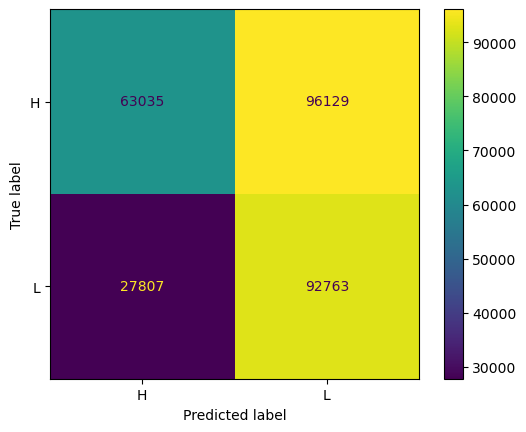

In [20]:
conf_matrix = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["H","L"]).plot()

In [21]:
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           H       0.69      0.40      0.50    159164
           L       0.49      0.77      0.60    120570

    accuracy                           0.56    279734
   macro avg       0.59      0.58      0.55    279734
weighted avg       0.61      0.56      0.55    279734



# Non Linear SVMs

### RBF (Radical Basis Function)

In [23]:
from sklearn.svm import SVC

In [24]:
rbf_SVC  = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling improves the performance
    ('svm_clf', SVC(kernel='rbf', C=1.0, gamma='scale', cache_size=7000,class_weight="balanced"))
])

In [25]:
rbf_SVC.fit(train_X,train_Y)

In [ ]:
with open('./RBF_SVC.pkl', 'wb') as file:
    pickle.dump(rbf_SVC, file)

In [ ]:
pred_Y = rbf_SVC.predict(test_X)

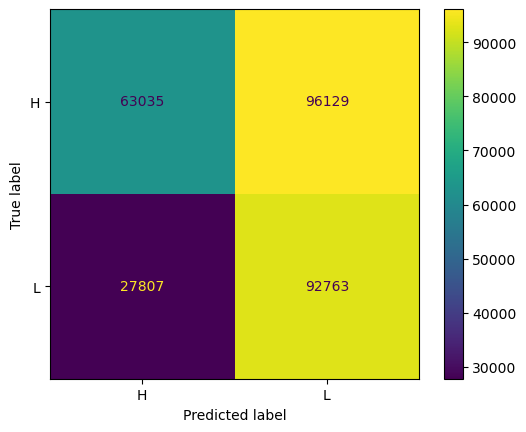

In [ ]:
conf_matrix = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["H","L"]).plot()

In [ ]:
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           H       0.69      0.40      0.50    159164
           L       0.49      0.77      0.60    120570

    accuracy                           0.56    279734
   macro avg       0.59      0.58      0.55    279734
weighted avg       0.61      0.56      0.55    279734

